In [1]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

# GEO EM FILE

In [3]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'][0,:,:]

# time, LAT, LON ncfiles

In [4]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

# import FMAASO 400 data

In [5]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

#tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')
tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp_zcoords.nc')
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

# tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp.nc')
# u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp.nc')
# v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp.nc')
# w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp.nc')

In [7]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

z = tk_ncfile.variables['z'][:]
tk_400 = tk_ncfile.variables['TK'][:]
w_400 = w_ncfile.variables['W'][:]

# import FMAASO 1000 data

In [9]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp_zcoords.nc')
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

In [10]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

tk_1000 = tk_ncfile.variables['TK'][:]
w_1000 = w_ncfile.variables['W'][:]

# get time stamps

In [11]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

In [12]:
# SET ALL OCEAN GRID POINTS EQUAL TO NAN
tk_400_landmask = numpy.copy(tk_400)
tk_400_landmask[:,:,landmask==0] = numpy.nan

tk_1000_landmask = numpy.copy(tk_1000)
tk_1000_landmask[:,:,landmask==0] = numpy.nan

w_400_landmask = numpy.copy(w_400)
w_400_landmask[:,:,landmask==0] = numpy.nan

w_1000_landmask = numpy.copy(w_1000)
w_1000_landmask[:,:,landmask==0] = numpy.nan

threshold = 9.96921e+36

w_400_landmask[w_400_landmask==threshold] = numpy.nan
w_1000_landmask[w_1000_landmask==threshold] = numpy.nan
tk_400_landmask[tk_400_landmask==threshold] = numpy.nan
tk_1000_landmask[tk_1000_landmask==threshold] = numpy.nan


In [13]:
################################################################################
################################################################################
# CALCULATE DIFFERENCES, FORCE TO BE LAND ONLY GRID POINTS

# PULL OUT LONGITUDINAL AND LATITUDINAL RANGE
lon_hi = -35.
lon_lo = -75.
lat_lo = -10.
lat_hi = 10.

xlat_indices = numpy.array((xlat>=lat_lo) & (xlat<=lat_hi), dtype=bool)
xlong_indices = numpy.array((xlong>=lon_lo) & (xlong<=lon_hi), dtype=bool)
xlat_subset = xlat[xlat_indices[:,0],:]
xlat_subset = xlat_subset[:,xlong_indices[0,:]]
xlong_subset = xlong[xlat_indices[:,0],:]
xlong_subset = xlong_subset[:,xlong_indices[0,:]]

# QVAPOR DIFFERENCES
print("differences")
tk_landmask_diffs = tk_1000_landmask[:,:,:,:] - tk_400_landmask[:,:,:,:]
w_landmask_diffs = w_1000[:,:,:,:] - w_400[:,:,:,:]
time = time[:]

# QVAPOR SUBSET LATITUDES
print("latitude and longitude subset")
tk_landmask_diffs = tk_landmask_diffs[:,:,xlat_indices[:,0],:]
tk_landmask_diffs = tk_landmask_diffs[:,:,:,xlong_indices[0,:]]

w_landmask_diffs = w_landmask_diffs[:,:,xlat_indices[:,0],:]
w_landmask_diffs = w_landmask_diffs[:,:,:,xlong_indices[0,:]]

# TAKE REGIONAL SUBSETS
w_400_landmask_region = w_400_landmask[:,:,xlat_indices[:,0],:]
w_400_landmask_region = w_400_landmask_region[:,:,:,xlong_indices[0,:]]
w_1000_landmask_region = w_1000_landmask[:,:,xlat_indices[:,0],:]
w_1000_landmask_region = w_1000_landmask_region[:,:,:,xlong_indices[0,:]]
tk_400_landmask_region = tk_400_landmask[:,:,xlat_indices[:,0],:]
tk_400_landmask_region = tk_400_landmask_region[:,:,:,xlong_indices[0,:]]
tk_1000_landmask_region = tk_1000_landmask[:,:,xlat_indices[:,0],:]
tk_1000_landmask_region = tk_1000_landmask_region[:,:,:,xlong_indices[0,:]]

differences
latitude and longitude subset


# decomposition:

$\overline{wT} = \overline{T}\,\overline{T} + \overline{w' T'}$

* See, e.g., Hartmann's text (new version, section 4.6, pages 115-116)

# overbar (left-hand side)

In [14]:
# ============================================================================ #

# overbar(qT) = overbar(overbar(q)*overbar(w)) + overbar(Tprime*wprime)

### overbar(qT)
qT_400_landmask = w_400_landmask_region*tk_400_landmask_region
qT_1000_landmask = w_1000_landmask_region*tk_1000_landmask_region

qT_400_time_mean = numpy.nanmean(qT_400_landmask, axis=0)
qT_1000_time_mean = numpy.nanmean(qT_1000_landmask, axis=0)

qT_400_time_space_mean = numpy.nanmean(qT_400_time_mean, axis=(1,2))
qT_1000_time_space_mean = numpy.nanmean(qT_1000_time_mean, axis=(1,2))

qT_diffs_overbar = qT_1000_time_space_mean - qT_400_time_space_mean

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


In [15]:
skip_time = 24

In [16]:
# ================================================================================
### overbar(q)*overbar(w)
tk_400_time_mean = numpy.nanmean(tk_400_landmask_region[skip_time:,:,:,:], axis=0)
tk_1000_time_mean = numpy.nanmean(tk_1000_landmask_region[skip_time:,:,:,:], axis=0)

w_400_time_mean = numpy.nanmean(w_400_landmask_region[skip_time:,:,:,:], axis=0)
w_1000_time_mean = numpy.nanmean(w_1000_landmask_region[skip_time:,:,:,:], axis=0)

Tbar_wbar_400 = tk_400_time_mean*w_400_time_mean
Tbar_wbar_1000 = tk_1000_time_mean*w_1000_time_mean
Tbar_wbar_400_space_mean = numpy.nanmean(Tbar_wbar_400, axis=(1,2))
Tbar_wbar_1000_space_mean = numpy.nanmean(Tbar_wbar_1000, axis=(1,2))

Tbar_wbar_diffs = Tbar_wbar_1000-Tbar_wbar_400
Tbar_wbar_diffs_space_mean = numpy.nanmean(Tbar_wbar_diffs, axis=(1,2))

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice


In [17]:
# ================================================================================
### overbar(Tprime*wprime)
Tprime_400 = tk_400_landmask_region - tk_400_time_mean
Tprime_1000 = tk_1000_landmask_region - tk_1000_time_mean

wprime_400 = w_400_landmask_region - w_400_time_mean
wprime_1000 = w_1000_landmask_region - w_1000_time_mean

Tprime_wprime_400 = Tprime_400*wprime_400
Tprime_wprime_1000 = Tprime_1000*wprime_1000

Tprime_wprime_400_time_mean = numpy.nanmean(Tprime_wprime_400[skip_time:,:,:,:], axis=0)
Tprime_wprime_1000_time_mean = numpy.nanmean(Tprime_wprime_1000[skip_time:,:,:,:], axis=0)
Tprime_wprime_400_space_mean = numpy.nanmean(Tprime_wprime_400_time_mean, axis=(1,2))
Tprime_wprime_1000_space_mean = numpy.nanmean(Tprime_wprime_1000_time_mean, axis=(1,2))

Tprime_wprime_diffs = Tprime_wprime_1000_time_mean - Tprime_wprime_400_time_mean
Tprime_wprime_diffs_space_mean = numpy.nanmean(Tprime_wprime_diffs, axis=(1,2))

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


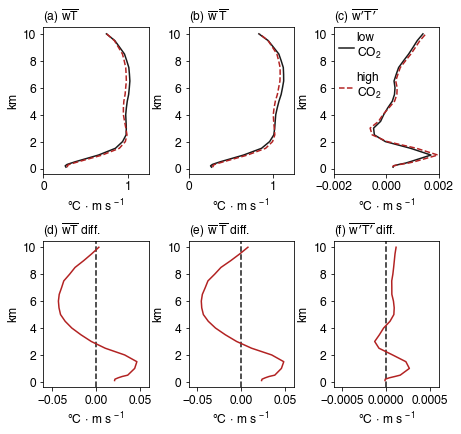

In [32]:
fontsize=12
fig,ax=mp.subplots(ncols=3,nrows=2)
fig.set_size_inches(6.5,6)

ax[0,0].plot(qT_400_time_space_mean, z, c='0.1', label='low CO$_2$')
ax[0,0].plot(qT_1000_time_space_mean, z, c='firebrick', ls='--', label='high CO$_2$')
ax[0,0].tick_params(labelsize=fontsize)
#handles, labels = ax[0,0].get_legend_handles_labels()
#ax[0,0].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(0.99,0.99), bbox_transform=ax[0,0].transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

ax[1,0].axvline(x=0, c='0.1', ls='--')
ax[1,0].plot(qT_diffs_overbar, z, c='firebrick', label='diffs')
ax[1,0].tick_params(labelsize=fontsize)

# =====
ax[0,2].plot(Tprime_wprime_400_space_mean, z, c='0.1', label='low\nCO$_2$')
ax[0,2].plot(Tprime_wprime_1000_space_mean, z, c='firebrick', ls='--', label='high\nCO$_2$')
ax[0,2].tick_params(labelsize=fontsize)
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(0.02,0.98), \
               bbox_transform=ax[0,2].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

ax[1,2].axvline(x=0, c='0.1', ls='--')
ax[1,2].plot(Tprime_wprime_diffs_space_mean, z, c='firebrick', label='diffs')
ax[1,2].tick_params(labelsize=fontsize)

# =====
ax[0,1].plot(Tbar_wbar_400_space_mean, z, c='0.1', label='low CO$_2$')
ax[0,1].plot(Tbar_wbar_1000_space_mean, z, c='firebrick', ls='--', label='high CO$_2$')
ax[0,1].tick_params(labelsize=fontsize)
#handles, labels = ax[0,1].get_legend_handles_labels()
#ax[0,1].legend(handles, labels, fontsize=fontsize, scatterpoints=2, ncol=1, bbox_to_anchor=(0.99,0.99), bbox_transform=ax[0,1].transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)


ax[1,1].axvline(x=0, c='0.1', ls='--')
ax[1,1].plot(Tbar_wbar_diffs_space_mean, z, c='firebrick', label='diffs')
ax[1,1].tick_params(labelsize=fontsize)

ax[0,0].text(s='(a) '+r"$\overline{wT}$", x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[0,0].transAxes)
ax[0,1].text(s='(b) '+r"$\overline{w} \,\, \overline{T}$", x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[0,1].transAxes)
ax[0,2].text(s='(c) '+r"$\overline{w \prime T \prime}$", x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[0,2].transAxes)
ax[1,0].text(s='(d) '+r"$\overline{wT}$"+' diff.', x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[1,0].transAxes)
ax[1,1].text(s='(e) '+r"$\overline{w} \,\, \overline{T}$"+' diff.', x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[1,1].transAxes)
ax[1,2].text(s='(f) '+r"$\overline{w \prime T \prime}$"+' diff.', x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[1,2].transAxes)

ax[0,0].set_xlim(0,1.25)
ax[0,1].set_xlim(0,1.25)
ax[0,2].set_xlim(-0.002,0.002)

ax[1,0].set_xlim(-0.06,0.06)
ax[1,1].set_xlim(-0.06,0.06)
ax[1,2].set_xlim(-0.0006,0.0006)

# ax[1,0].set_xticks([-0.0035,0,0.0035])
# ax[1,1].set_xticks([-0.0035,0,0.0035])
# ax[1,2].set_xticks([-0.00035,0,0.00035])

# ax[1,0].set_xticklabels(['-0.0035','0','0.0035'])
# ax[1,1].set_xticklabels(['-0.0035','0','0.0035'])
# ax[1,2].set_xticklabels(['-0.00035','0','0.00035'])

ax[0,0].set_ylabel('km', fontsize=fontsize)
ax[1,0].set_ylabel('km', fontsize=fontsize)
ax[0,1].set_ylabel('km', fontsize=fontsize)
ax[1,1].set_ylabel('km', fontsize=fontsize)
ax[0,2].set_ylabel('km', fontsize=fontsize)
ax[1,2].set_ylabel('km', fontsize=fontsize)

ax[0,0].set_xlabel(DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[0,1].set_xlabel(DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[0,2].set_xlabel(DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[1,0].set_xlabel(DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[1,1].set_xlabel(DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[1,2].set_xlabel(DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', fontsize=fontsize)

#ax[0,0].text(s='km', x=-0.25, y=0.5, transform=ax[0,0].transAxes, ha='center', va='center', rotation=90, fontsize=fontsize)
#ax[1,0].text(s='km', x=-0.25, y=0.5, transform=ax[1,0].transAxes, ha='center', va='center', rotation=90, fontsize=fontsize)

fig.tight_layout(h_pad=2.5, w_pad=0)
fig.subplots_adjust(left=0.1, top=0.95)
mp.show()

fig.savefig('figureXX_qT_decomposition.png', dpi=600, bbox_inches='tight', transparent=True)

# now do same calculations for 3hour means

In [33]:
#skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

times_indices_list = [times_00,times_03,times_06,times_09,times_12,times_15,times_18,times_21]

# overbar(qT):  left-hand side

In [34]:
# ============================================================================ #

# overbar(qT) = overbar(overbar(q)*overbar(w)) + overbar(Tprime*wprime)

### overbar(qT)
qT_400_landmask_3hr_list = [w_400_landmask_region[skip_time:,:,:,:][indices,:,:,:]*\
                            tk_400_landmask_region[indices,:,:,:] \
                            for indices in times_indices_list]

qT_1000_landmask_3hr_list = [w_1000_landmask_region[skip_time:,:,:,:][indices,:,:,:]*\
                            tk_1000_landmask_region[indices,:,:,:] \
                            for indices in times_indices_list]

qT_400_time_mean_list = [numpy.nanmean(data, axis=0) for data in qT_400_landmask_3hr_list]
qT_1000_time_mean_list = [numpy.nanmean(data, axis=0) for data in qT_1000_landmask_3hr_list]

qT_400_time_space_mean_list = [numpy.nanmean(data, axis=(1,2)) for data in qT_400_time_mean_list]
qT_1000_time_space_mean_list = [numpy.nanmean(data, axis=(1,2)) for data in qT_1000_time_mean_list]

# qT_diffs_overbar = qT_1000_time_space_mean - qT_400_time_space_mean

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 241 but corresponding boolean dimension is 217
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 241 but corresponding boolean dimension is 217
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: Runtim

In [35]:
# ================================================================================
### overbar(q)*overbar(w)
tk_400_time_mean_list = [numpy.nanmean(tk_400_landmask_region[skip_time:,:,:,:][indices,:,:,:], axis=0) \
                             for indices in times_indices_list]
tk_1000_time_mean_list = [numpy.nanmean(tk_1000_landmask_region[skip_time:,:,:,:][indices,:,:,:], axis=0) \
                             for indices in times_indices_list]

w_400_time_mean_list = [numpy.nanmean(w_400_landmask_region[skip_time:,:,:,:][indices,:,:,:], axis=0) \
                             for indices in times_indices_list]
w_1000_time_mean_list = [numpy.nanmean(w_1000_landmask_region[skip_time:,:,:,:][indices,:,:,:], axis=0) \
                             for indices in times_indices_list]

Tbar_wbar_400_list = [tk_400_time_mean_list[i]*w_400_time_mean_list[i] for i in range(n_intervals)]
Tbar_wbar_1000_list = [tk_1000_time_mean_list[i]*w_1000_time_mean_list[i] for i in range(n_intervals)]

Tbar_wbar_400_space_mean_list = [numpy.nanmean(Tbar_wbar_400_list[i],axis=(1,2)) for i in range(n_intervals)]
Tbar_wbar_1000_space_mean_list = [numpy.nanmean(Tbar_wbar_1000_list[i],axis=(1,2)) for i in range(n_intervals)]

Tbar_wbar_diffs_list = [Tbar_wbar_1000_list[i]-Tbar_wbar_400_list[i] for i in range(n_intervals)]
Tbar_wbar_diffs_space_mean_list = [numpy.nanmean(Tbar_wbar_diffs_list[i],axis=(1,2)) for i in range(n_intervals)]

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


In [36]:
# ================================================================================
### overbar(Tprime*wprime)
Tprime_400_list = [tk_400_landmask_region[skip_time:,:,:,:][times_indices_list[i],:,:,:]-\
                   tk_400_time_mean_list[i] for i in range(8)]
Tprime_1000_list = [tk_1000_landmask_region[skip_time:,:,:,:][times_indices_list[i],:,:,:]-\
                   tk_1000_time_mean_list[i] for i in range(8)]

wprime_400_list = [w_400_landmask_region[skip_time:,:,:,:][times_indices_list[i],:,:,:]-\
                   w_400_time_mean_list[i] for i in range(8)]
wprime_1000_list = [w_1000_landmask_region[skip_time:,:,:,:][times_indices_list[i],:,:,:]-\
                   w_1000_time_mean_list[i] for i in range(8)]

Tprime_wprime_400_list = [Tprime_400_list[i]*wprime_400_list[i] for i in range(8)]
Tprime_wprime_1000_list = [Tprime_1000_list[i]*wprime_1000_list[i] for i in range(8)]

Tprime_wprime_400_time_mean_list = [numpy.nanmean(Tprime_wprime_400_list[i], axis=0) for i in range(8)]
Tprime_wprime_1000_time_mean_list = [numpy.nanmean(Tprime_wprime_1000_list[i], axis=0) for i in range(8)]
Tprime_wprime_400_space_mean_list = [numpy.nanmean(Tprime_wprime_400_time_mean_list[i], axis=(1,2)) for i in range(8)]
Tprime_wprime_1000_space_mean_list = [numpy.nanmean(Tprime_wprime_1000_time_mean_list[i], axis=(1,2)) for i in range(8)]

Tprime_wprime_diffs_list = [Tprime_wprime_1000_time_mean_list[i] - Tprime_wprime_400_time_mean_list[i] for i in range(8)]
Tprime_wprime_diffs_space_mean_list = [numpy.nanmean(Tprime_wprime_diffs_list[i], axis=(1,2)) for i in range(8)]

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


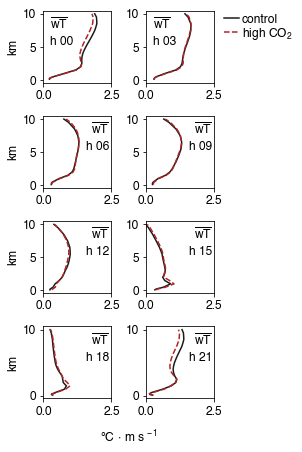

In [80]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(qT_400_time_space_mean_list[i],z,color='0.1',label='control')
    ax.plot(qT_1000_time_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(0,2.5)
    if i in [0,1]:
        ax.text(s='h '+hour_strings[i],x=0.1,y=0.65,ha='left',va='top',transform=ax.transAxes,fontsize=fontsize)
        ax.text(s='$\overline{wT}$',x=0.1,y=0.92,ha='left',va='top',transform=ax.transAxes,fontsize=fontsize)
    else:
        ax.text(s='h '+hour_strings[i],x=0.97,y=0.65,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
        ax.text(s='$\overline{wT}$',x=0.97,y=0.92,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax_list.append(ax)
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=0, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s=DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', x=xhalf, y=0, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)

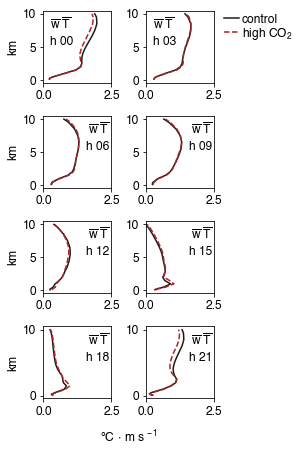

In [82]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(Tbar_wbar_400_space_mean_list[i],z,color='0.1',label='control')
    ax.plot(Tbar_wbar_1000_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(0,2.5)
    if i in [0,1]:
        ax.text(s='h '+hour_strings[i],x=0.1,y=0.65,ha='left',va='top',transform=ax.transAxes,fontsize=fontsize)
        ax.text(s='$\overline{w}\,\,\overline{T}$',x=0.1,y=0.92,ha='left',va='top',transform=ax.transAxes,fontsize=fontsize)
    else:
        ax.text(s='h '+hour_strings[i],x=0.97,y=0.65,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
        ax.text(s='$\overline{w}\,\,\overline{T}$',x=0.97,y=0.92,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax_list.append(ax)
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=0, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s=DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', x=xhalf, y=0, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)

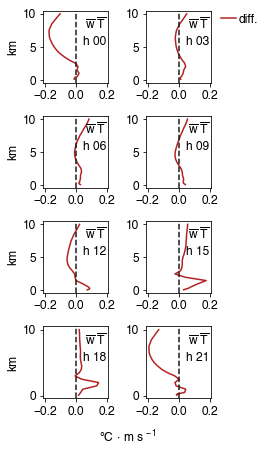

In [69]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(Tbar_wbar_diffs_space_mean_list[i],z,color='firebrick',label='diff.')
    ax.axvline(x=0,ls='--',color='0.1')
    #ax.plot(Tbar_wbar_1000_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.text(s='h '+hour_strings[i],x=0.97,y=0.65,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax.text(s='$\overline{w}\,\,\overline{T}$',x=0.97,y=0.92,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax_list.append(ax)
    ax.set_xlim(-0.21,0.21)
    #ax.set_xticks([-0.004,0.01])
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s=DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', x=xhalf, y=0, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)

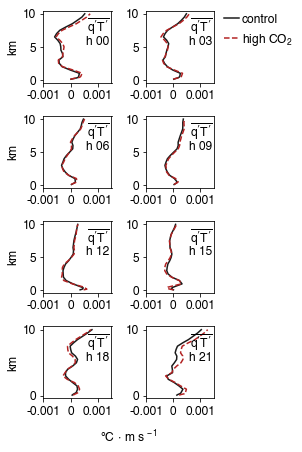

In [78]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(Tprime_wprime_400_space_mean_list[i],z,color='0.1',label='control')
    ax.plot(Tprime_wprime_1000_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(-0.001,0.0015)
    ax.set_xticks([-0.001,0,0.001])
    ax.set_xticklabels(['-0.001','0','0.001'])
    ax.text(s='h '+hour_strings[i],x=0.97,y=0.65,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax.text(s="$\overline{q'T'}$",x=0.97,y=0.92,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax_list.append(ax)
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s=DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', x=xhalf, y=0, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)

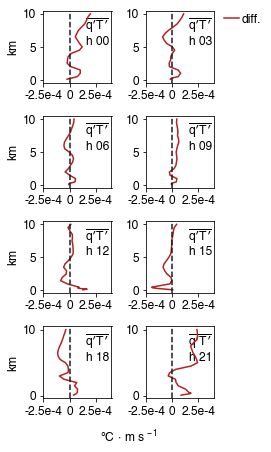

In [79]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(Tprime_wprime_diffs_space_mean_list[i],z,color='firebrick',label='diff.')
    ax.axvline(x=0,ls='--',color='0.1')
    #ax.plot(Tbar_wbar_1000_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(-2.5e-4,4e-4)
    ax.set_xticks([-2.5e-4,0,2.5e-4])
    ax.set_xticklabels(['-2.5e-4','0','2.5e-4'])
    ax.text(s='h '+hour_strings[i],x=0.97,y=0.65,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize,zorder=0)
    ax.text(s='$\overline{q\prime T\prime}$',x=0.97,y=0.92,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize,zorder=0)
    ax_list.append(ax)
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s=DEGREE_SIGN+'C'+'$\,\cdot\,$'+'m s$^{\,-1}$', x=xhalf, y=0, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)